In [1]:
pip install 'natural_pdf[all]'


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Importing and starting with the first five to see if it runs correctly together

In [18]:
import os
import pandas as pd
import requests
df = pd.read_csv("gsr_data_2023_2024.csv")

top_5 = df.head(5)

# Create a folder to save PDFs
os.makedirs("pdfs", exist_ok=True)

for _, row in top_5.iterrows():
    url = row["PDF_URL"]
    school = row["School"]
    filename = f"{school.replace(' ', '_').replace(',', '')}.pdf"
    filepath = os.path.join("pdfs", filename)

    try:
        print(f"Downloading: {school}")
        response = requests.get(url)
        response.raise_for_status()
        with open(filepath, "wb") as f:
            f.write(response.content)
        print(f"Saved to {filepath}")
    except Exception as e:
        print(f"Failed to download {school}: {e}")

Downloading: Arizona State University
Failed to download Arizona State University: 404 Client Error: Not Found for url: https://web3.ncaa.org/aprsearch/public_reports/inst2024/28.pdf?v=1748710721067
Downloading: University of Arizona
Saved to pdfs/University_of_Arizona.pdf
Downloading: Arkansas State University
Failed to download Arkansas State University: 404 Client Error: Not Found for url: https://web3.ncaa.org/aprsearch/public_reports/inst2024/30.pdf?v=1748710721067
Downloading: University of Arkansas, Fayetteville
Failed to download University of Arkansas, Fayetteville: 404 Client Error: Not Found for url: https://web3.ncaa.org/aprsearch/public_reports/inst2024/31.pdf?v=1748710721067
Downloading: University of Arkansas at Little Rock
Saved to pdfs/University_of_Arkansas_at_Little_Rock.pdf


In [2]:
from natural_pdf import PDF
import pandas as pd

[2025-08-12 11:49:14,609] [ WARNING] surya.py:27 - Could not import Surya dependencies (layout and/or table_rec): No module named 'surya.common'


In [3]:
import os

pdf_folder = "pdfs"

pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])[:5]

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    print(f"Processing: {filename}")
    
    pdf = PDF(filepath)
    
    if not pdf.pages:
        continue
    
    page = pdf.pages[0]
    
    page.find("text").show()

Processing: 2007_FSR.pdf
Processing: Abilene_Christian_University.pdf
Processing: Alabama_A&M_University.pdf
Processing: Alabama_State_University.pdf
Processing: Alcorn_State_University.pdf


In [ ]:
#Starting to build boxes around what I need and extracting 

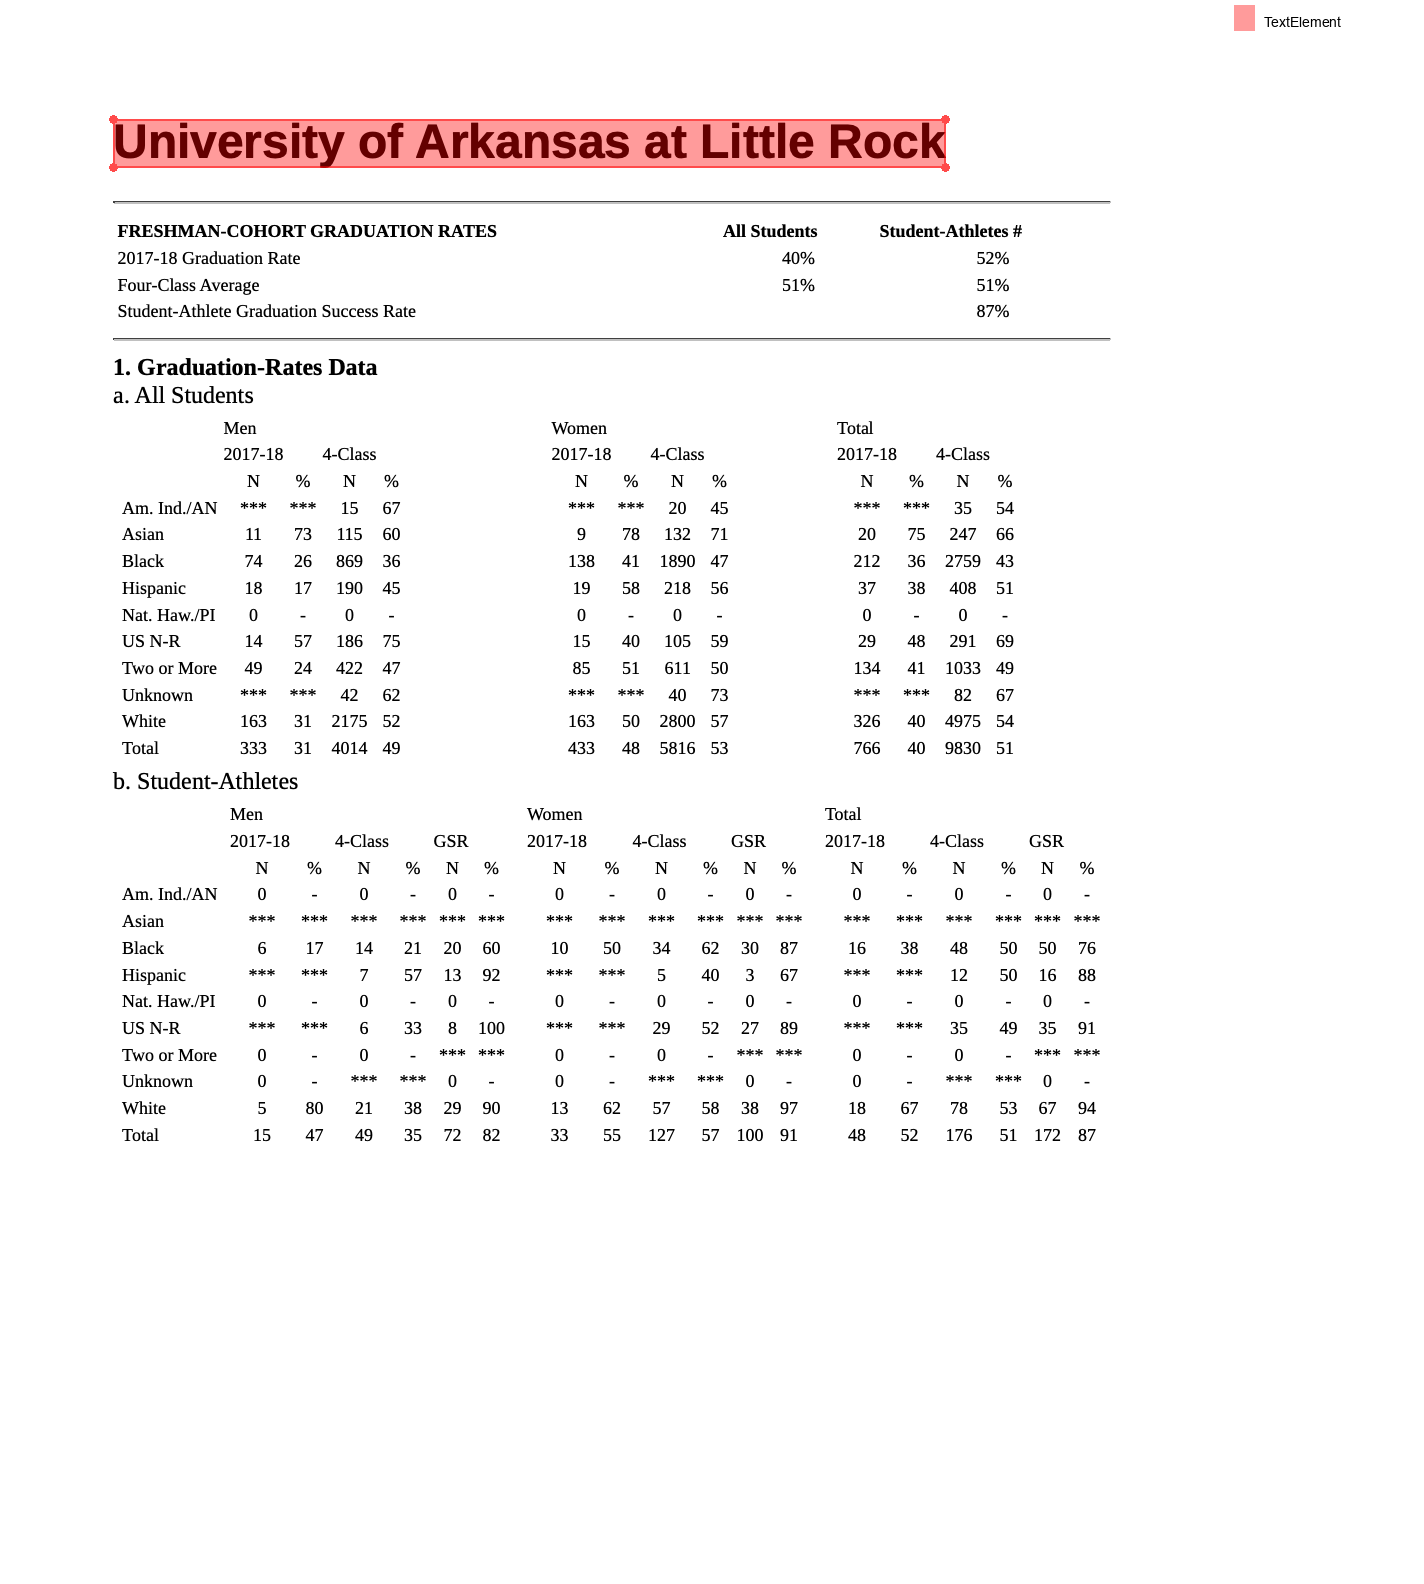

In [5]:
page.find('text').show()

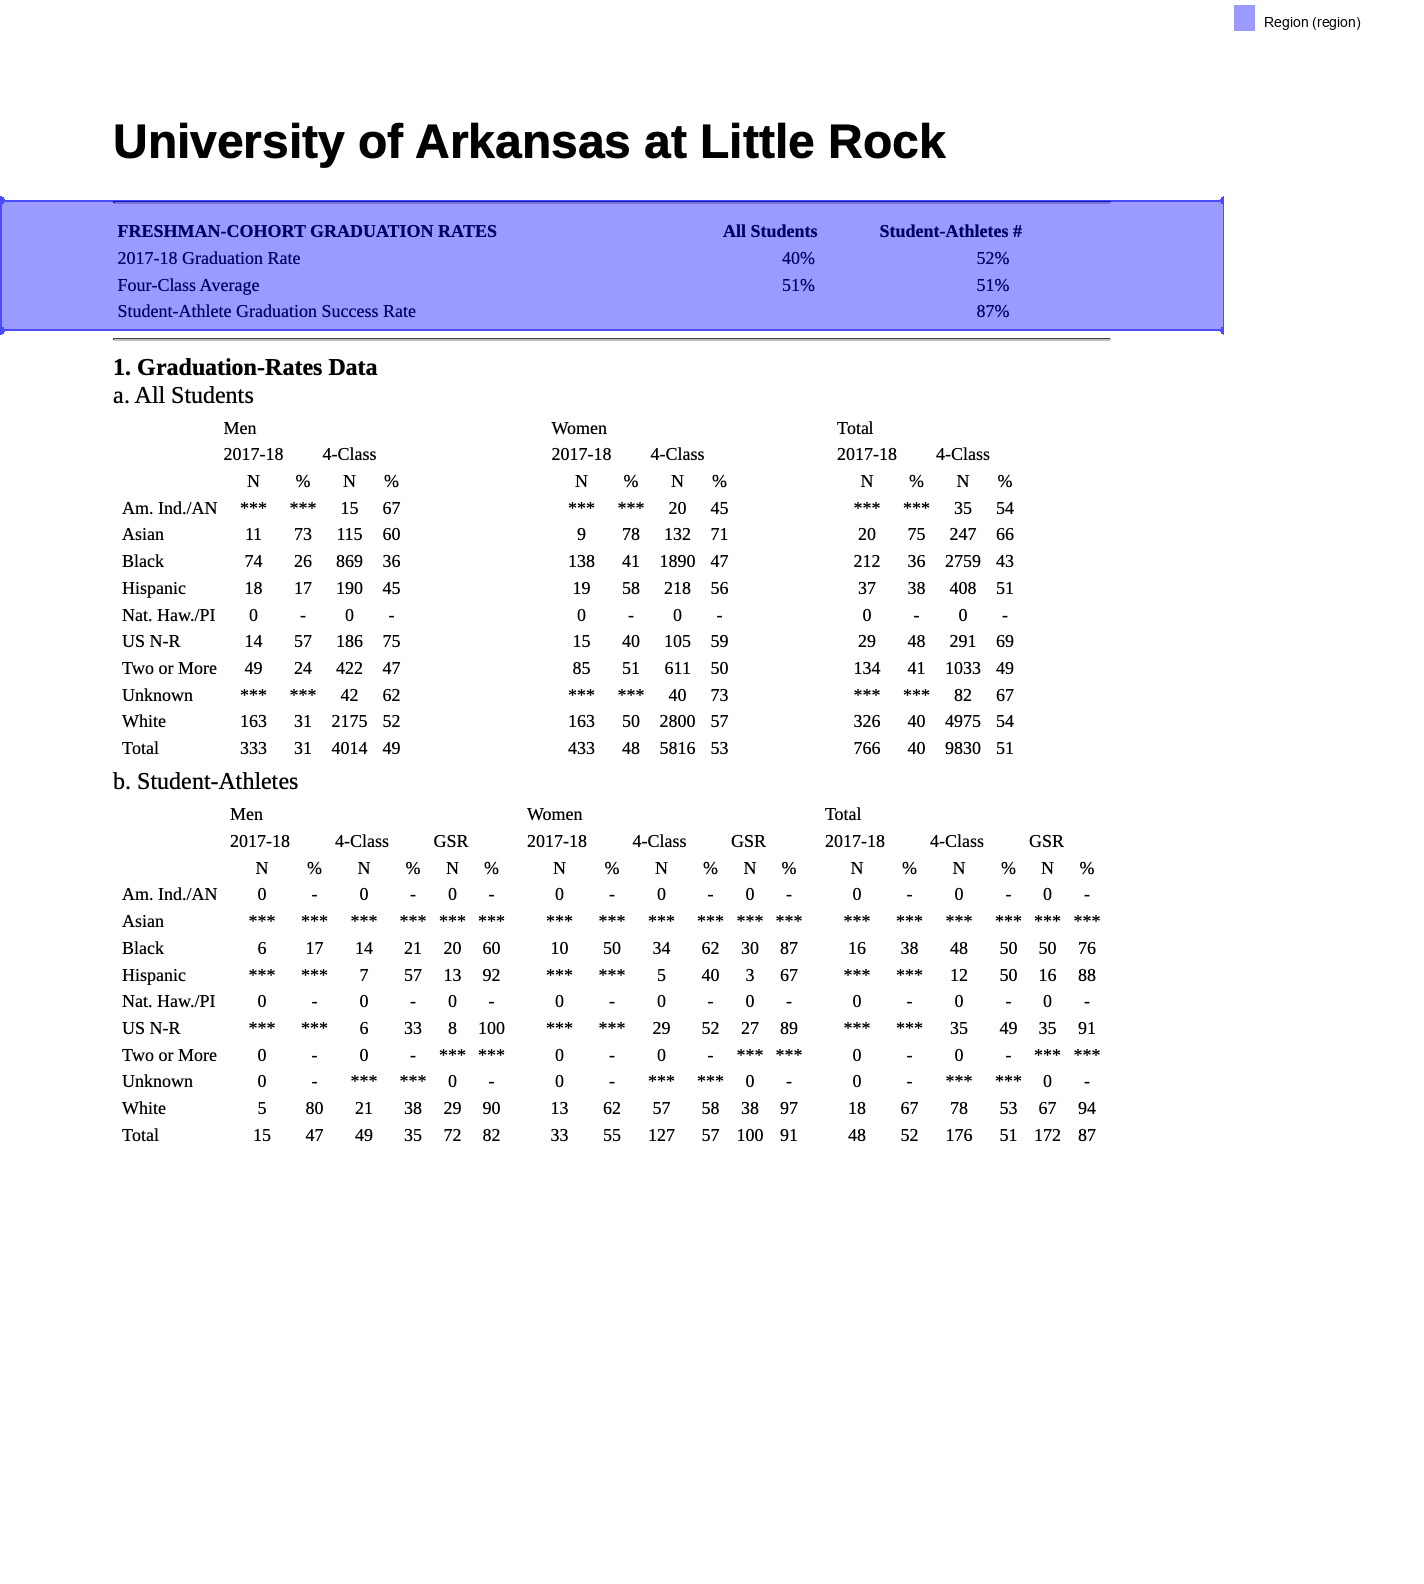

In [6]:
top_table = page.region(top=100, height=65)
top_table.show()

In [7]:
rows = top_table.extract_table(table_settings={'snap_y_tolerance': 5})
rows

[['FRESHMAN-COHORT GRADUATION RATES All Students', 'Student-Athletes'],
 ['2017-18 Graduation Rate 40%', '52%'],
 ['Four-Class Average 51%', '51%'],
 ['Student-Athlete Graduation Success Rate', '87%']]

In [8]:
rows = top_table.extract_table(table_settings={'snap_y_tolerance': 5})

header = rows[0]
data = rows[1:]

pd.DataFrame(data, columns=header)

,FRESHMAN-COHORT GRADUATION RATES All Students,Student-Athletes
0,2017-18 Graduation Rate 40%,52%
1,Four-Class Average 51%,51%
2,Student-Athlete Graduation Success Rate,87%


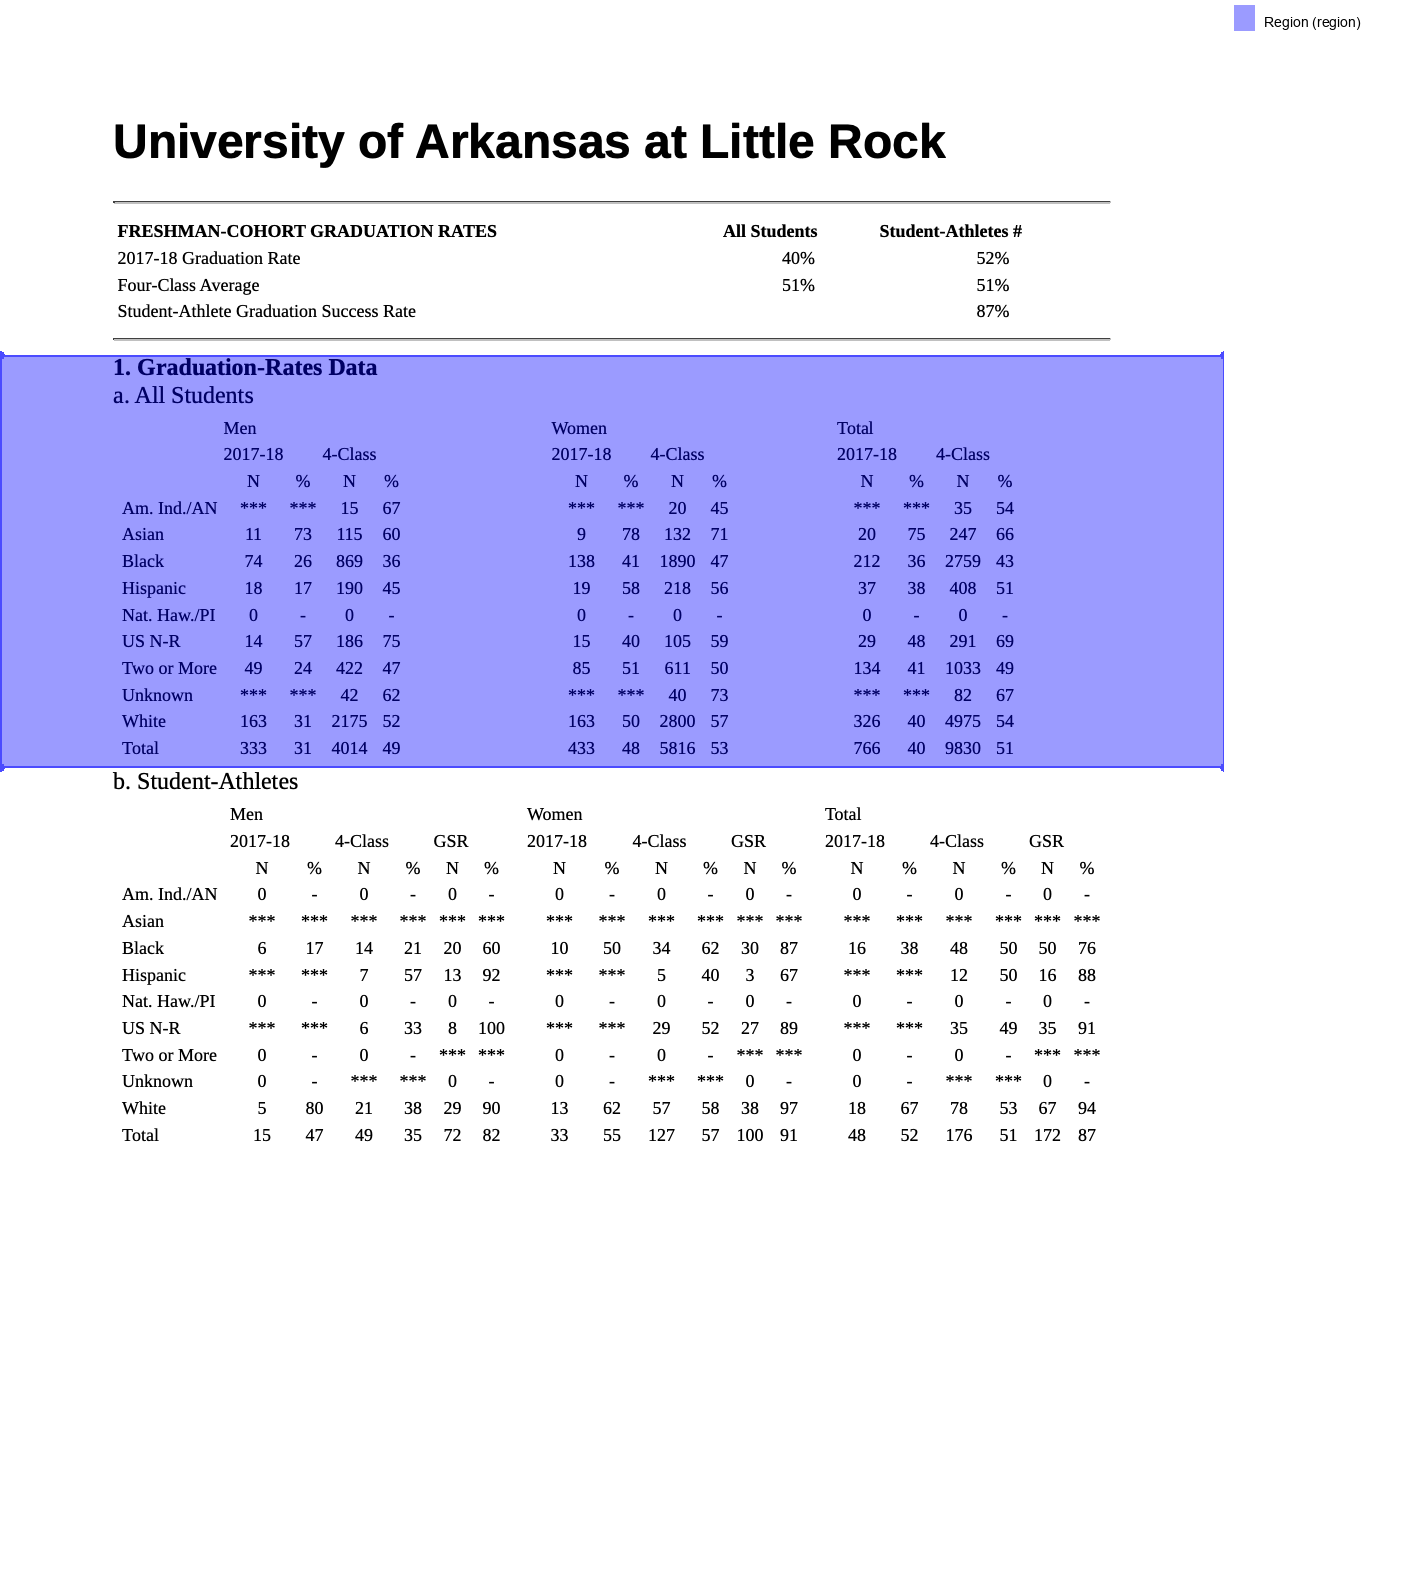

In [9]:
(
    page
    .find(text='b. Student-Athletes')
    .above(until='text:contains("Graduation-Rates Data")')
    .show()
)

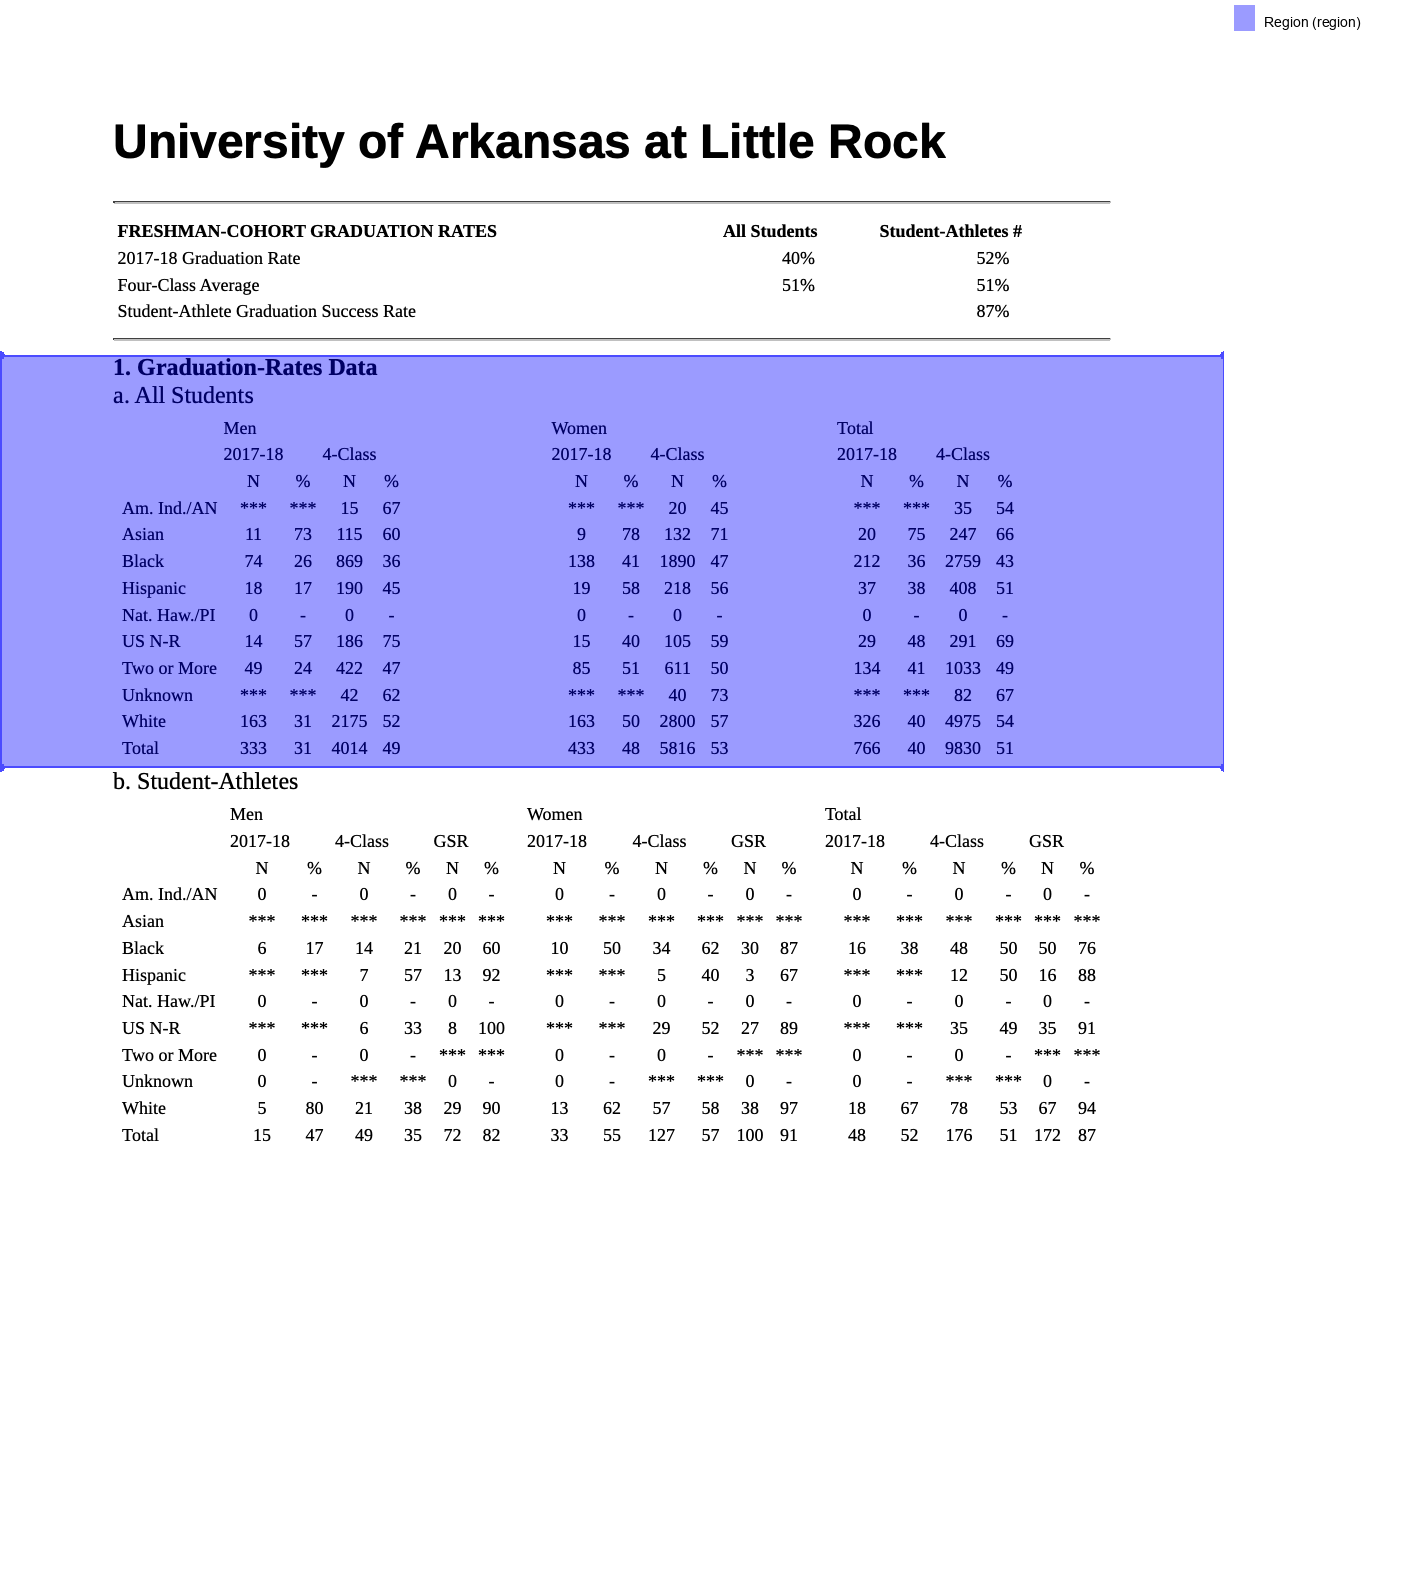

In [10]:
table = (
    page

    .find(text='b. Student-Athletes')
    .above(until='text:contains("Graduation-Rates Data")')
)
table.show()

In [11]:
rows = table.extract_table(table_settings={'snap_y_tolerance': 5})
rows

[['',
  '2017-18',
  '',
  '4-Class',
  '',
  '2017-18',
  '',
  '4-Class',
  '',
  '2017-18',
  '',
  '4-Class',
  ''],
 ['', 'N', '%', 'N', '%', 'N', '%', 'N', '%', 'N', '%', 'N', '%'],
 ['Am. Ind./AN',
  '***',
  '***',
  '15',
  '67',
  '***',
  '***',
  '20',
  '45',
  '***',
  '***',
  '35',
  '54'],
 ['Asian',
  '11',
  '73',
  '115',
  '60',
  '9',
  '78',
  '132',
  '71',
  '20',
  '75',
  '247',
  '66'],
 ['Black',
  '74',
  '26',
  '869',
  '36',
  '138',
  '41',
  '1890',
  '47',
  '212',
  '36',
  '2759',
  '43'],
 ['Hispanic',
  '18',
  '17',
  '190',
  '45',
  '19',
  '58',
  '218',
  '56',
  '37',
  '38',
  '408',
  '51'],
 ['Nat. Haw./PI', '0', '-', '0', '-', '0', '-', '0', '-', '0', '-', '0', '-'],
 ['US N-R',
  '14',
  '57',
  '186',
  '75',
  '15',
  '40',
  '105',
  '59',
  '29',
  '48',
  '291',
  '69'],
 ['Two or More',
  '49',
  '24',
  '422',
  '47',
  '85',
  '51',
  '611',
  '50',
  '134',
  '41',
  '1033',
  '49'],
 ['Unknown',
  '***',
  '***',
  '42',
  '6

In [ ]:
#Building a dataframe for the rows needed

In [12]:
base_header = rows[0][1:] 
sub_header = rows[1][1:] 
combined_cols = [f"{b} {s}" for b, s in zip(base_header, sub_header)]
full_header = ['Race'] + combined_cols
data = rows[2:]
df = pd.DataFrame(data, columns=full_header)
df

,Race,2017-18 N,%,4-Class N,%,2017-18 N,%,4-Class N,%,2017-18 N,%,4-Class N,%
0,Am. Ind./AN,***,***,15,67,***,***,20,45,***,***,35,54
1,Asian,11,73,115,60,9,78,132,71,20,75,247,66
2,Black,74,26,869,36,138,41,1890,47,212,36,2759,43
3,Hispanic,18,17,190,45,19,58,218,56,37,38,408,51
4,Nat. Haw./PI,0,-,0,-,0,-,0,-,0,-,0,-
5,US N-R,14,57,186,75,15,40,105,59,29,48,291,69
6,Two or More,49,24,422,47,85,51,611,50,134,41,1033,49
7,Unknown,***,***,42,62,***,***,40,73,***,***,82,67
8,White,163,31,2175,52,163,50,2800,57,326,40,4975,54
9,Total,333,31,4014,49,433,48,5816,53,766,40,9830,51


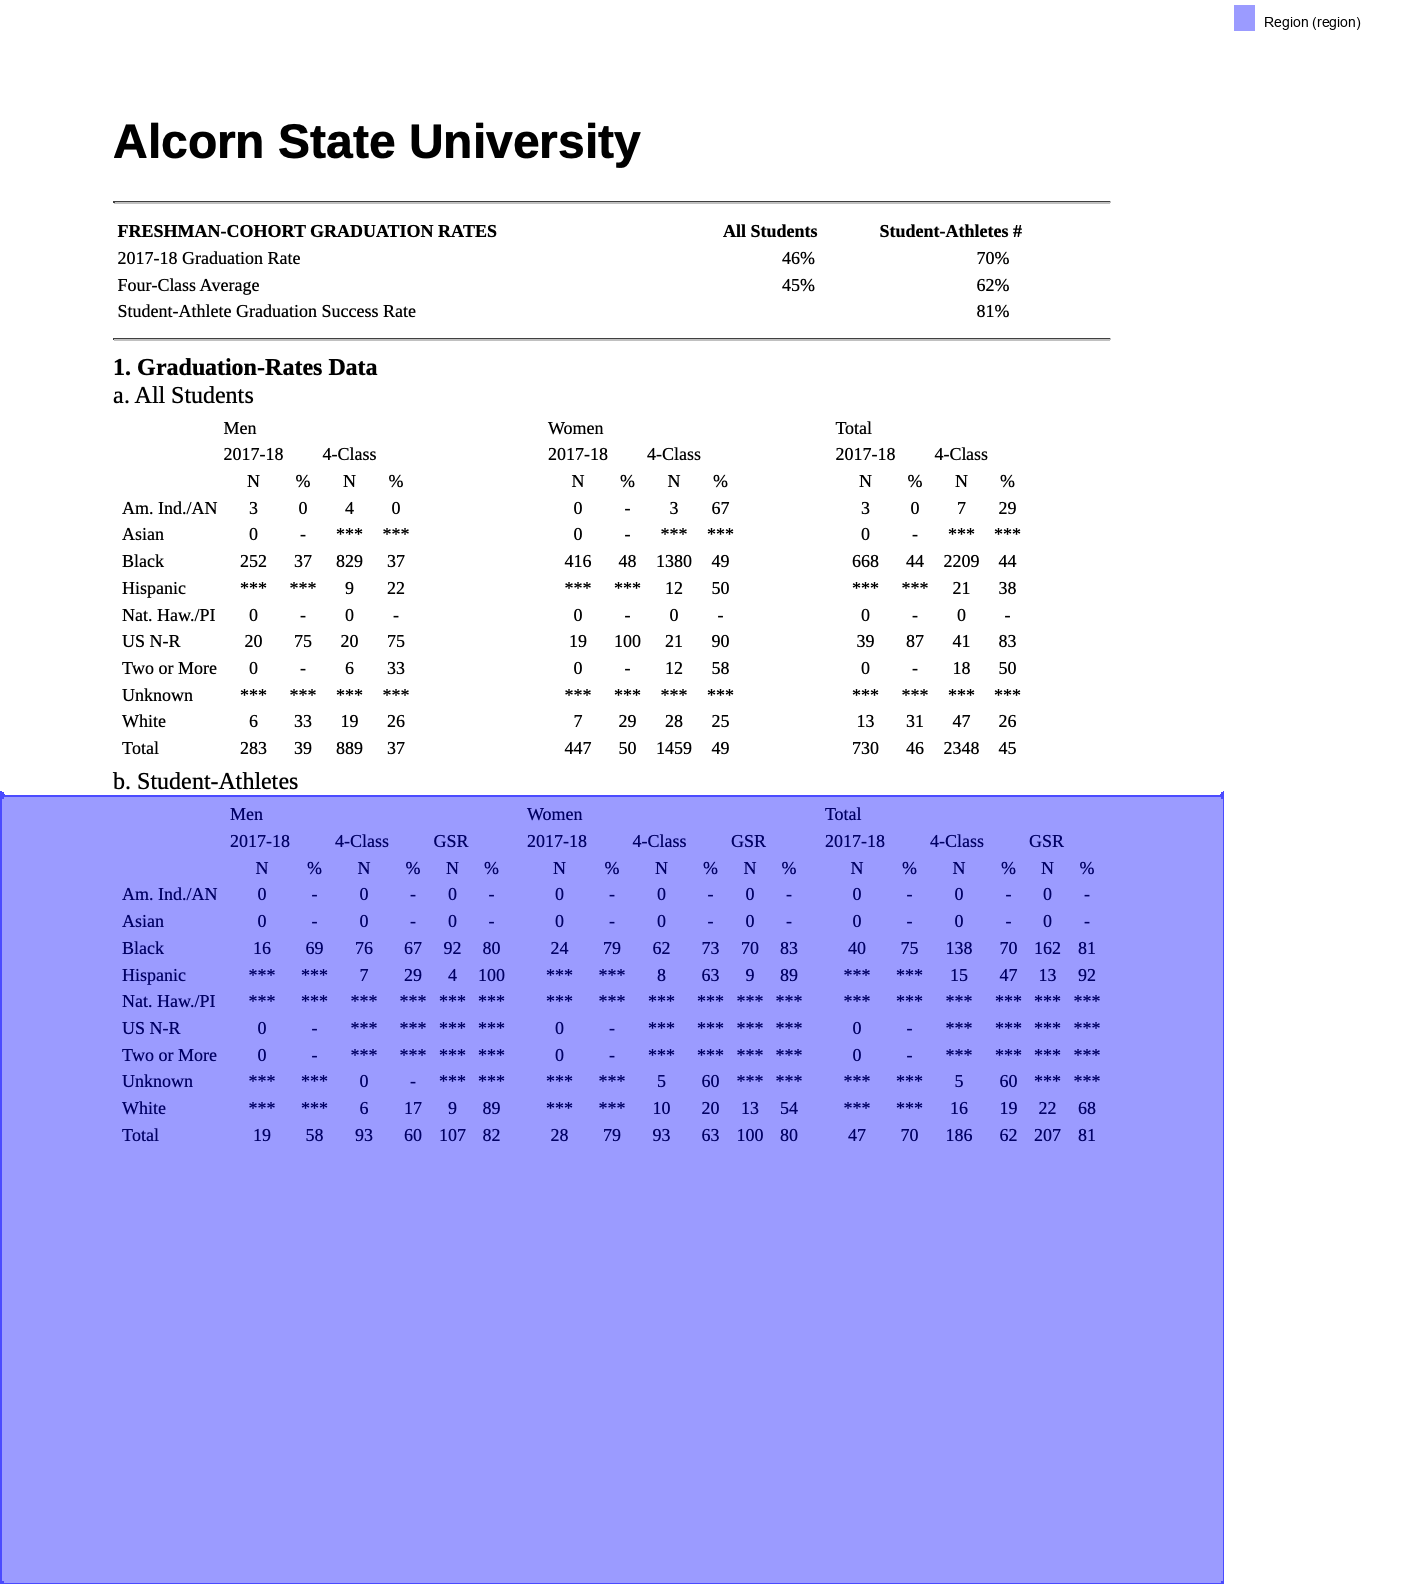

In [6]:
table_2 = (
    page

    .find(text='b. Student-Athletes')
    .below()
)
table_2.show()

In [7]:
rows_2 = table_2.extract_table(table_settings={'snap_y_tolerance': 5})
rows_2

[['20',
  '17-18',
  '',
  '4-Class',
  '',
  'GSR',
  '20',
  '17-18',
  '',
  '4-Class',
  '',
  'GSR',
  '20',
  '17-18',
  '',
  '4-Class',
  '',
  'GSR',
  ''],
 ['',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%'],
 ['Am. Ind./AN',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-'],
 ['Asian',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-'],
 ['Black',
  '16',
  '69',
  '76',
  '67',
  '92',
  '80',
  '24',
  '79',
  '62',
  '73',
  '70',
  '83',
  '40',
  '75',
  '138',
  '70',
  '162',
  '81'],
 ['Hispanic',
  '***',
  '***',
  '7',
  '29',
  '4',
  '100',
  '***',
  '***',
  '8',
  '63',
  '9',
  '89',
  '***',
  '***',
  '15',
  '47',
  '13',
  '92'],
 ['Nat. Haw./PI',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',


In [30]:
base_header_2 = rows_2[0][1:] 
sub_header_2 = rows_2[1][1:]
combined_cols_2 = [f"{b} {s}" for b, s in zip(base_header_2, sub_header_2)]
raw_header_2 = ['Race'] + combined_cols_2

full_header_2 = ['Race'] + [f"Student-Athletes {col}" for col in combined_cols_2]

data_2 = rows_2[2:]
data_2_padded = [row[:len(full_header_2)] + [""] * (len(full_header_2) - len(row)) for row in data_2]

df_2 = pd.DataFrame(data_2_padded, columns=full_header_2)
df_2.head()

,Race,Student-Athletes 17-18 N,Student-Athletes %,Student-Athletes 4-Class N,Student-Athletes %,Student-Athletes GSR N,Student-Athletes 20 %,Student-Athletes 17-18 N,Student-Athletes %,Student-Athletes 4-Class N,Student-Athletes %,Student-Athletes GSR N,Student-Athletes 20 %,Student-Athletes 17-18 N,Student-Athletes %,Student-Athletes 4-Class N,Student-Athletes %,Student-Athletes GSR N,Student-Athletes %
0,Am. Ind./AN,0,-,0,-,0,-,0,-,0,-,0,-,0,-,0,-,0,-
1,Asian,***,***,***,***,0,-,***,***,***,***,3,100,***,***,***,***,3,100
2,Black,18,61,53,47,48,75,4,100,19,95,23,100,22,68,72,60,71,83
3,Hispanic,***,***,3,100,6,100,***,***,4,100,4,100,***,***,7,100,10,100
4,Nat. Haw./PI,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***


In [ ]:
#Processing the PDF's to start running thorugh them all 

In [13]:
import os
import requests

df = pd.read_csv("gsr_data_2023_2024.csv")

pdf_folder = "pdfs"
os.makedirs(pdf_folder, exist_ok=True)
for _, row in df.iterrows():
    url = row["PDF_URL"]
    school = row["School"]
    filename = f"{school.replace(' ', '_').replace(',', '')}.pdf"
    filepath = os.path.join(pdf_folder, filename)

    if os.path.exists(filepath):
        print(f"Already downloaded: {school}")
        continue

    try:
        print(f"Downloading: {school}")
        response = requests.get(url)
        response.raise_for_status()
        with open(filepath, "wb") as f:
            f.write(response.content)
        print(f"Saved to {filepath}")
    except Exception as e:
        print(f"Failed to download {school}: {e}")

pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    print(f"Processing: {filename}")
    
    pdf = PDF(filepath)
    
    if not pdf.pages:
        print("No pages found in this PDF.")
        continue

    page = pdf.pages[0]
    try:
        page.find("text").show()
    except Exception as e:
        print(f"Could not show bounding boxes for {filename}: {e}")

Already downloaded: Arizona State University
Already downloaded: University of Arizona
Already downloaded: Arkansas State University
Already downloaded: University of Arkansas, Fayetteville
Already downloaded: University of Arkansas at Little Rock
Already downloaded: Auburn University
Already downloaded: Austin Peay State University
Already downloaded: Ball State University
Already downloaded: Charleston Southern University
Already downloaded: Baylor University
Already downloaded: Bethune-Cookman University
Already downloaded: Binghamton University
Already downloaded: Boise State University
Already downloaded: Boston College
Already downloaded: Boston University
Already downloaded: Bowling Green State University
Already downloaded: Bradley University
Already downloaded: Brigham Young University
Already downloaded: Brown University
Already downloaded: Bryant University
Already downloaded: Bucknell University
Already downloaded: University at Buffalo, the State University of New York
Alr

KeyboardInterrupt: 

In [14]:
df = pd.read_csv("gsr_data_2023_2024.csv")

pdf_folder = "pdfs_final"
os.makedirs(pdf_folder, exist_ok=True)

for _, row in df.iterrows():
    url = row["PDF_URL"]
    school = row["School"]
    filename = f"{school.replace(' ', '_').replace(',', '')}.pdf"
    filepath = os.path.join(pdf_folder, filename)

    if os.path.exists(filepath):
        print(f"Already downloaded: {school}")
        continue

    try:
        print(f"Downloading: {school}")
        response = requests.get(url)
        response.raise_for_status()
        with open(filepath, "wb") as f:
            f.write(response.content)
        print(f"Saved to {filepath}")
    except Exception as e:
        print(f"Failed to download {school}: {e}")
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    print(f"Processing: {filename}")
    
    pdf = PDF(filepath)
    
    if not pdf.pages:
        print("No pages found in this PDF.")
        continue

    page = pdf.pages[0]

    try:
        page.find("text").show()
    except Exception as e:
        print(f"Could not show bounding boxes for {filename}: {e}")

Already downloaded: Arizona State University
Already downloaded: University of Arizona
Already downloaded: Arkansas State University
Already downloaded: University of Arkansas, Fayetteville
Already downloaded: University of Arkansas at Little Rock
Already downloaded: Auburn University
Already downloaded: Austin Peay State University
Already downloaded: Ball State University
Already downloaded: Charleston Southern University
Already downloaded: Baylor University
Already downloaded: Bethune-Cookman University
Already downloaded: Binghamton University
Already downloaded: Boise State University
Already downloaded: Boston College
Already downloaded: Boston University
Already downloaded: Bowling Green State University
Already downloaded: Bradley University
Already downloaded: Brigham Young University
Already downloaded: Brown University
Already downloaded: Bryant University
Already downloaded: Bucknell University
Already downloaded: University at Buffalo, the State University of New York
Alr

KeyboardInterrupt: 

In [ ]:
#Test for the First Five

In [ ]:
def deduplicate_columns(columns):
    seen = {}
    deduped = []
    for col in columns:
        if col not in seen:
            seen[col] = 1
            deduped.append(col)
        else:
            seen[col] += 1
            deduped.append(f"{col}_{seen[col]-1}")
    return deduped

def extract_school_name(filename):
    return filename.replace(".pdf", "").replace("_", " ").strip()

pdf_folder = "pdfs"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])[:5]
all_rows = []

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school_name = extract_school_name(filename)
    pdf = PDF(filepath)

    if not pdf.pages:
        print(f"No pages in {filename}")
        continue

    page = pdf.pages[0]

    try:
        table = page.find(text='b. Student-Athletes').above(until='text:contains("Graduation-Rates Data")')
        rows = table.extract_table(table_settings={'snap_y_tolerance': 8})

        print(f"\nAll Students rows for {school_name}:")
        for r in rows: print(r)

        if not any(r and r[0] and r[0].strip().lower() == "total" for r in rows[2:]):
            print(f"WARNING: 'Total' row *not found* in All Students for {school_name}")
        else:
            print(f"'Total' row detected in All Students!")

        base_header = rows[0][1:]
        sub_header = rows[1][1:]
        combined_cols = [f"{b} {s}" for b, s in zip(base_header, sub_header)]
        full_header = ["Race"] + combined_cols
        data = rows[2:]
        data_padded = [row[:len(full_header)] + [""] * (len(full_header) - len(row)) for row in data]
        df_all = pd.DataFrame(data_padded, columns=full_header)
        df_all["Source"] = "All Students"
        df_all["School"] = school_name

        table_2 = page.find(text='b. Student-Athletes').below()
        rows_2 = table_2.extract_table(table_settings={'snap_y_tolerance': 8})

        print(f"\nStudent-Athletes rows for {school_name}:")
        for r in rows_2: print(r)

        if not any(r and r[0] and r[0].strip().lower() == "total" for r in rows_2[2:]):
            print(f"WARNING: 'Total' row *not found* in Student-Athletes for {school_name}")
        else:
            print(f"'Total' row detected in Student-Athletes!")

        base_header_2 = rows_2[0][1:]
        sub_header_2 = rows_2[1][1:]
        combined_cols_2 = [f"{b} {s}" for b, s in zip(base_header_2, sub_header_2)]
        full_header_2 = ["Race"] + [f"Student-Athletes {col}" for col in combined_cols_2]
        data_2 = rows_2[2:]
        data_2_padded = [row[:len(full_header_2)] + [""] * (len(full_header_2) - len(row)) for row in data_2]
        df_2 = pd.DataFrame(data_2_padded, columns=full_header_2)

        combined = pd.merge(df_all, df_2, on="Race", how="outer")
        combined.columns = deduplicate_columns(combined.columns)

        all_rows.append(combined)
        print(f"Merged {school_name}")

    except Exception as e:
        print(f"Failed to process {filename}: {e}")
if all_rows:
    final_df = pd.concat(all_rows, ignore_index=True)
    final_df.to_csv("first_5_combined_by_race.csv", index=False)
    print("Saved: first_5_combined_by_race.csv")
    display(final_df.head())
else:
    print("No data extracted from the first 5 PDFs.")

In [17]:
import os
import pandas as pd
from natural_pdf import PDF

def deduplicate_columns(columns):
    seen = {}
    deduped = []
    for col in columns:
        if col not in seen:
            seen[col] = 1
            deduped.append(col)
        else:
            seen[col] += 1
            deduped.append(f"{col}_{seen[col]-1}")
    return deduped

def extract_school_name(filename):
    return filename.replace(".pdf", "").replace("_", " ").strip()

pdf_folder = "pdfs"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])
all_rows = []

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school_name = extract_school_name(filename)
    pdf = PDF(filepath)

    if not pdf.pages:
        continue

    page = pdf.pages[0]

    try:
        # === All Students Table ===
        table = page.find(text='b. Student-Athletes').above(until='text:contains("Graduation-Rates Data")')
        rows = table.extract_table(table_settings={'snap_y_tolerance': 8})

        base_header = rows[0][1:]
        sub_header = rows[1][1:]
        combined_cols = [f"{b} {s}" for b, s in zip(base_header, sub_header)]
        full_header = ["Race"] + combined_cols
        data = rows[2:]
        data_padded = [row[:len(full_header)] + [""] * (len(full_header) - len(row)) for row in data]
        df_all = pd.DataFrame(data_padded, columns=full_header)
        df_all["Source"] = "All Students"
        df_all["School"] = school_name

        # === Student-Athletes Table ===
        table_2 = page.find(text='b. Student-Athletes').below()
        rows_2 = table_2.extract_table(table_settings={'snap_y_tolerance': 8})

        base_header_2 = rows_2[0][1:]
        sub_header_2 = rows_2[1][1:]
        combined_cols_2 = [f"{b} {s}" for b, s in zip(base_header_2, sub_header_2)]
        full_header_2 = ["Race"] + [f"Student-Athletes {col}" for col in combined_cols_2]
        data_2 = rows_2[2:]
        data_2_padded = [row[:len(full_header_2)] + [""] * (len(full_header_2) - len(row)) for row in data_2]
        df_2 = pd.DataFrame(data_2_padded, columns=full_header_2)

        # Merge and deduplicate columns
        combined = pd.merge(df_all, df_2, on="Race", how="outer")
        combined.columns = deduplicate_columns(combined.columns)

        all_rows.append(combined)

    except Exception as e:
        print(f"Failed for {filename}: {e}")
        continue

# Save final DataFrame
if all_rows:
    final_df = pd.concat(all_rows, ignore_index=True)
    final_df.to_csv("all_combined_by_race.csv", index=False)
    print("Saved to all_combined_by_race.csv")
else:
    print("No data extracted.")

KeyboardInterrupt: 

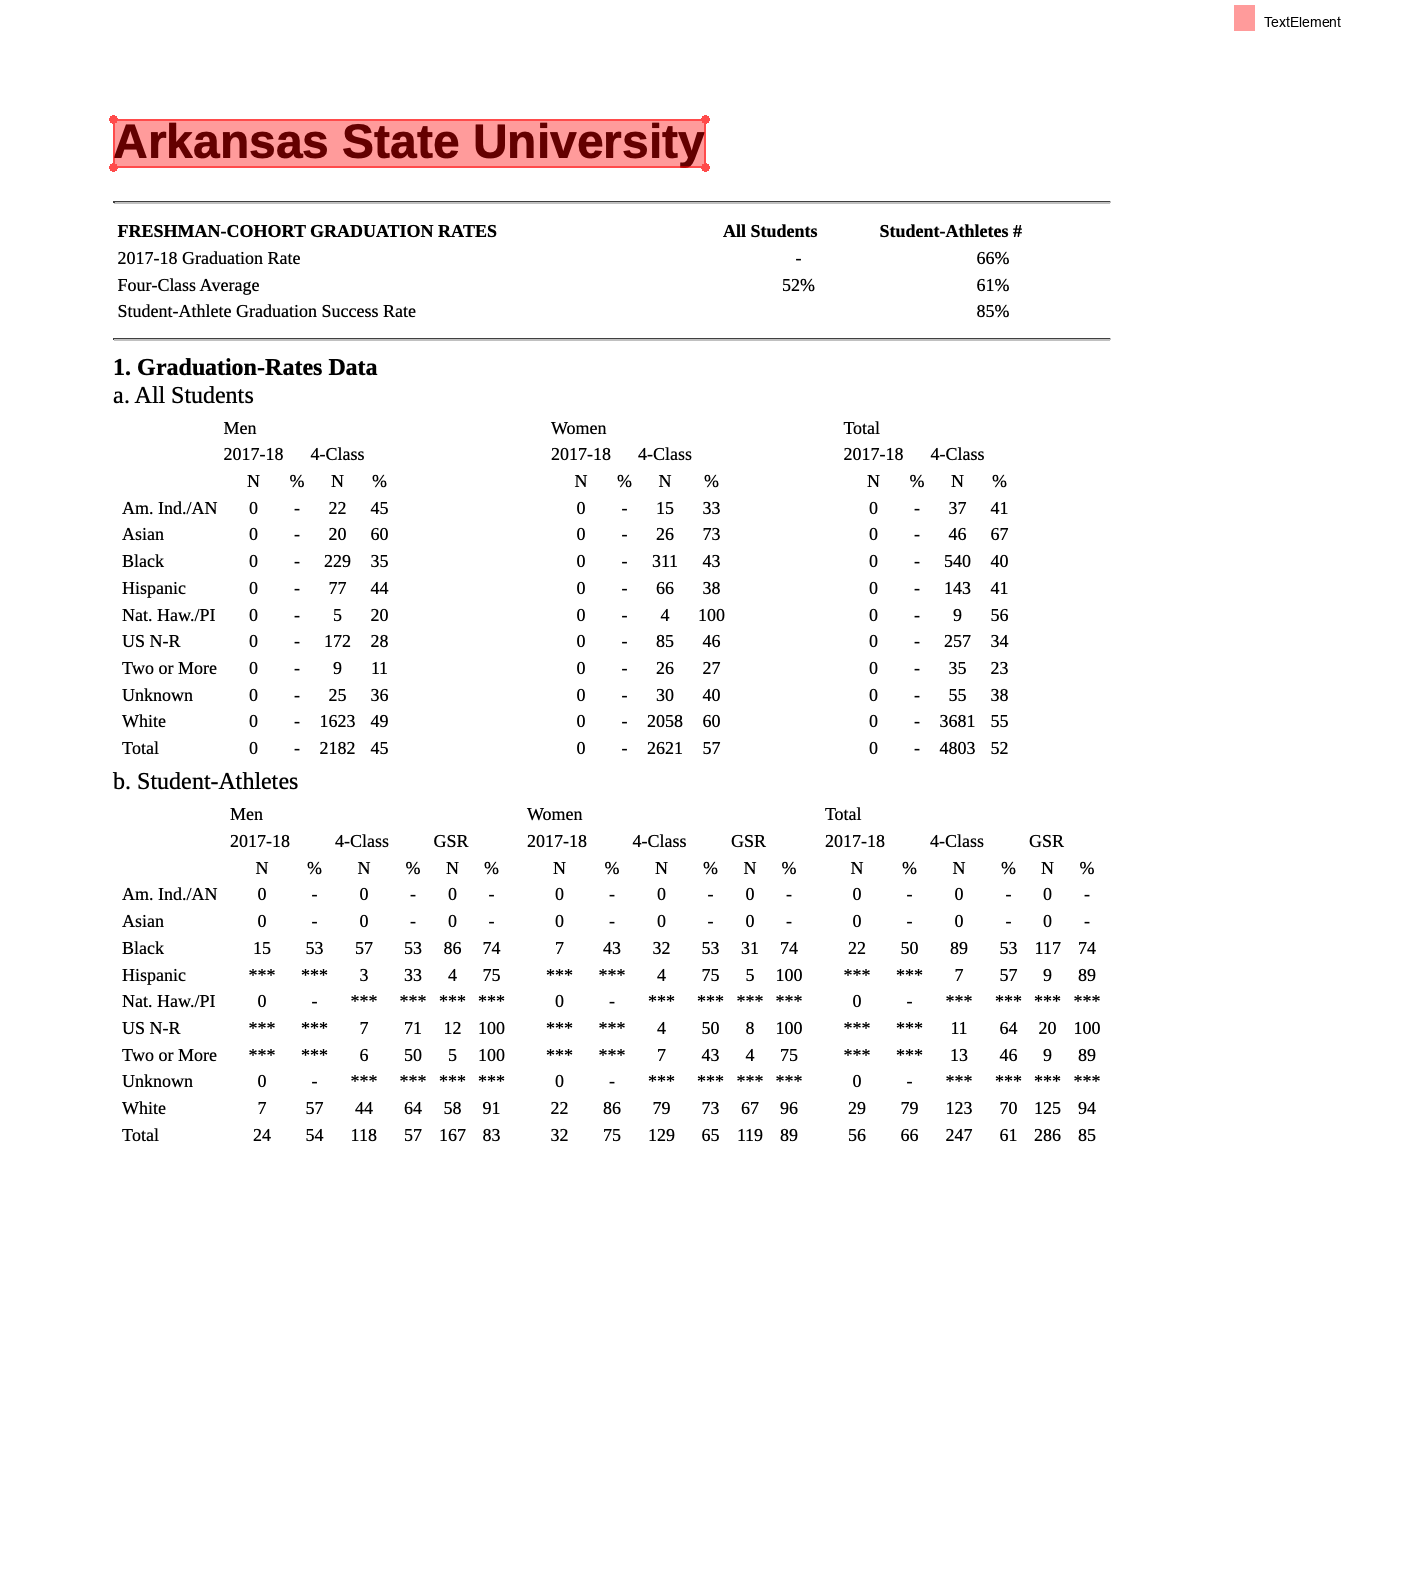

In [12]:
page.find('text').show()

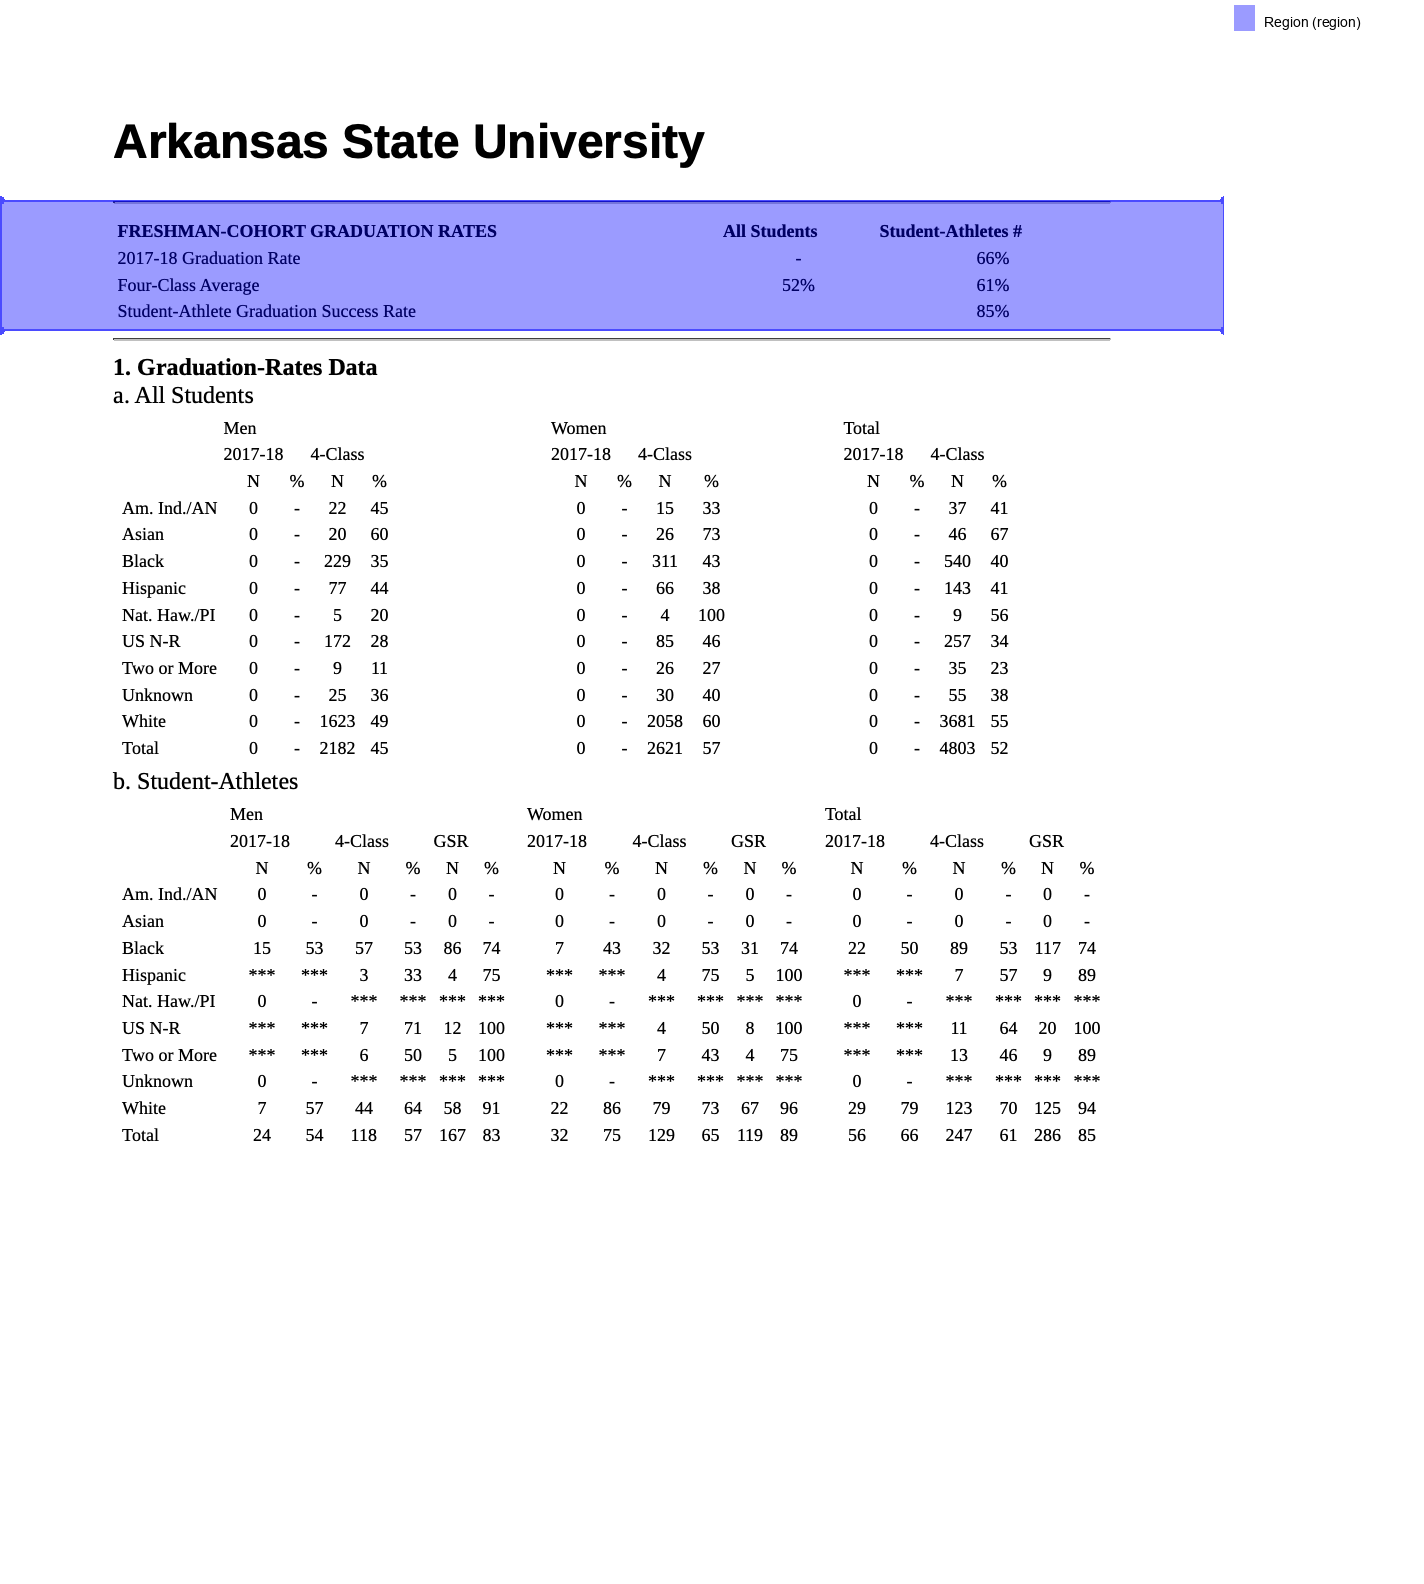

In [13]:
top_table = page.region(top=100, height=65)
top_table.show()

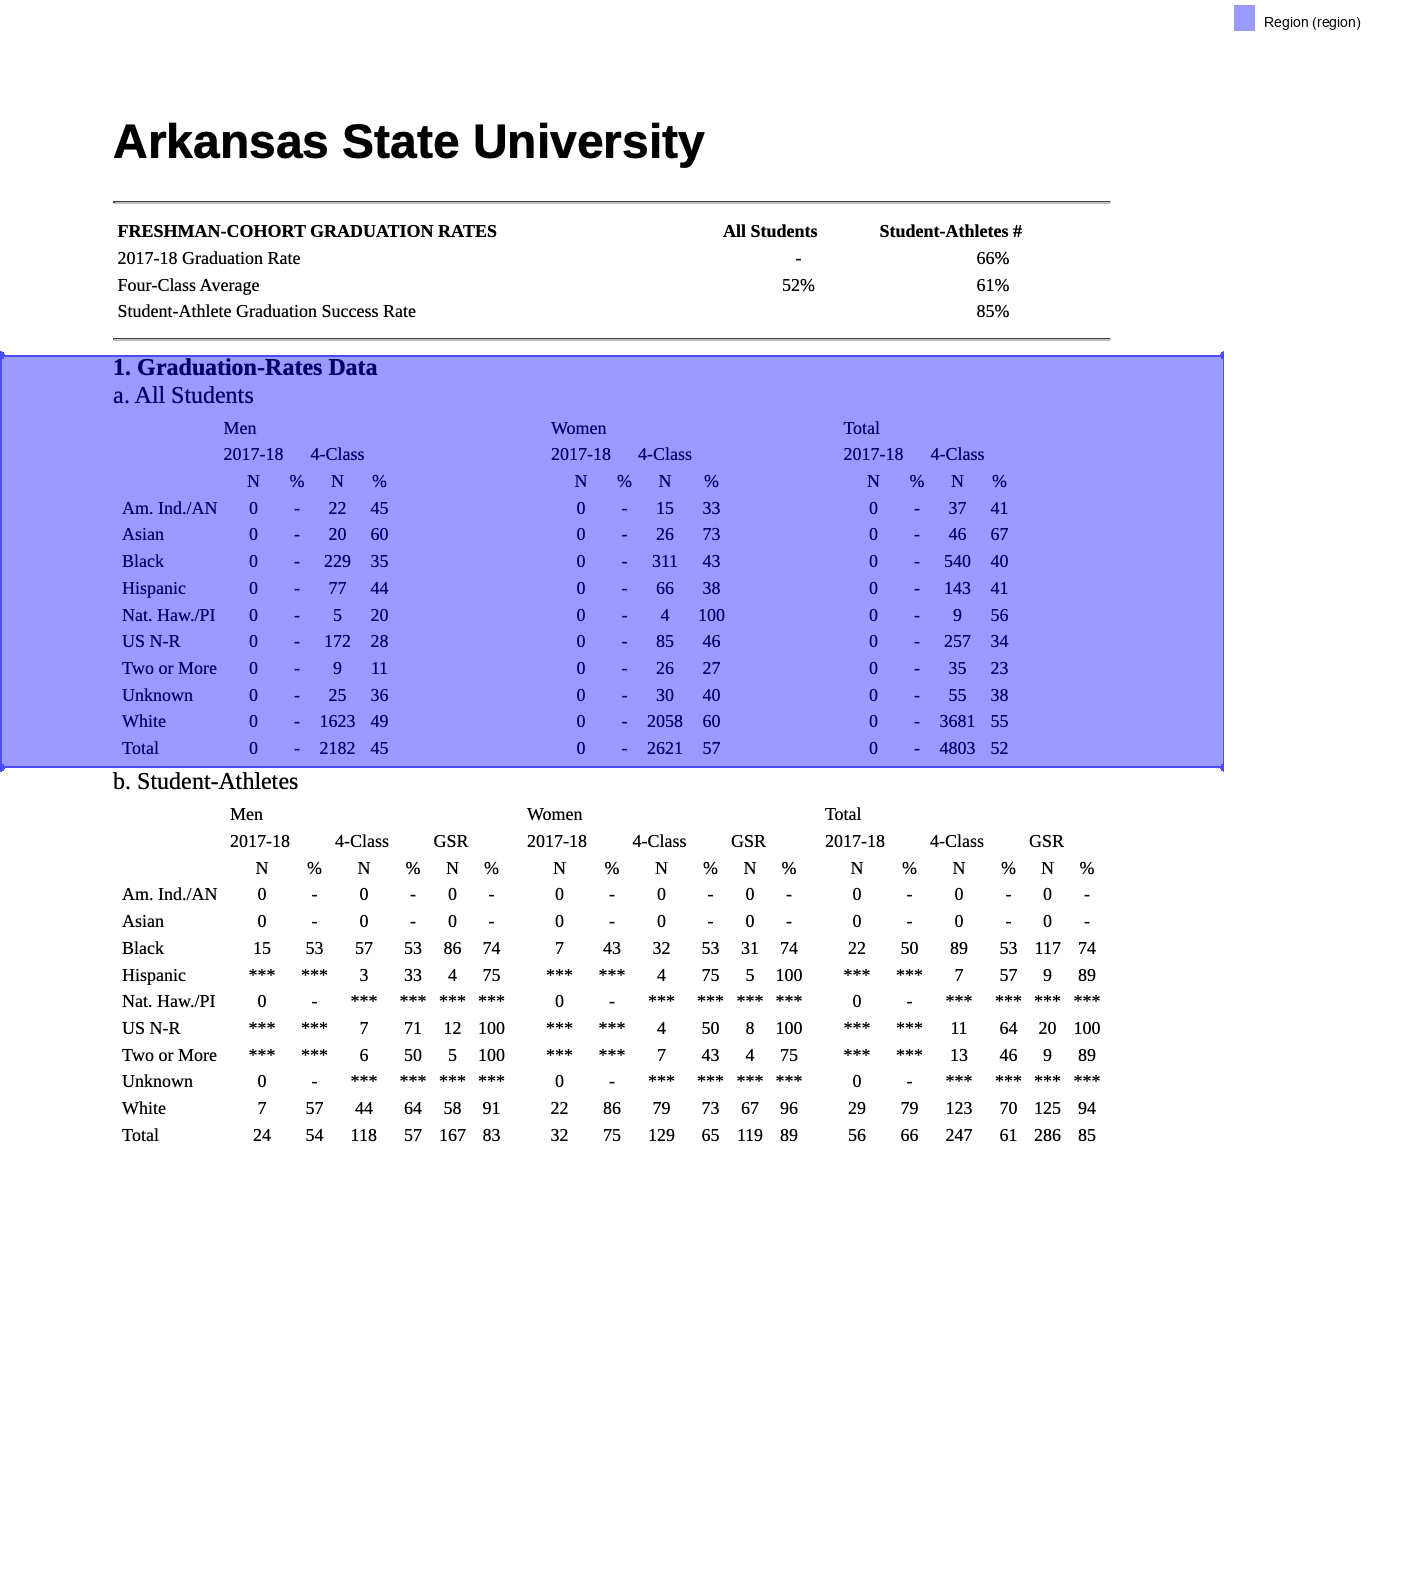

In [14]:
(
    page
    .find(text='b. Student-Athletes')
    .above(until='text:contains("Graduation-Rates Data")')
    .show()
)

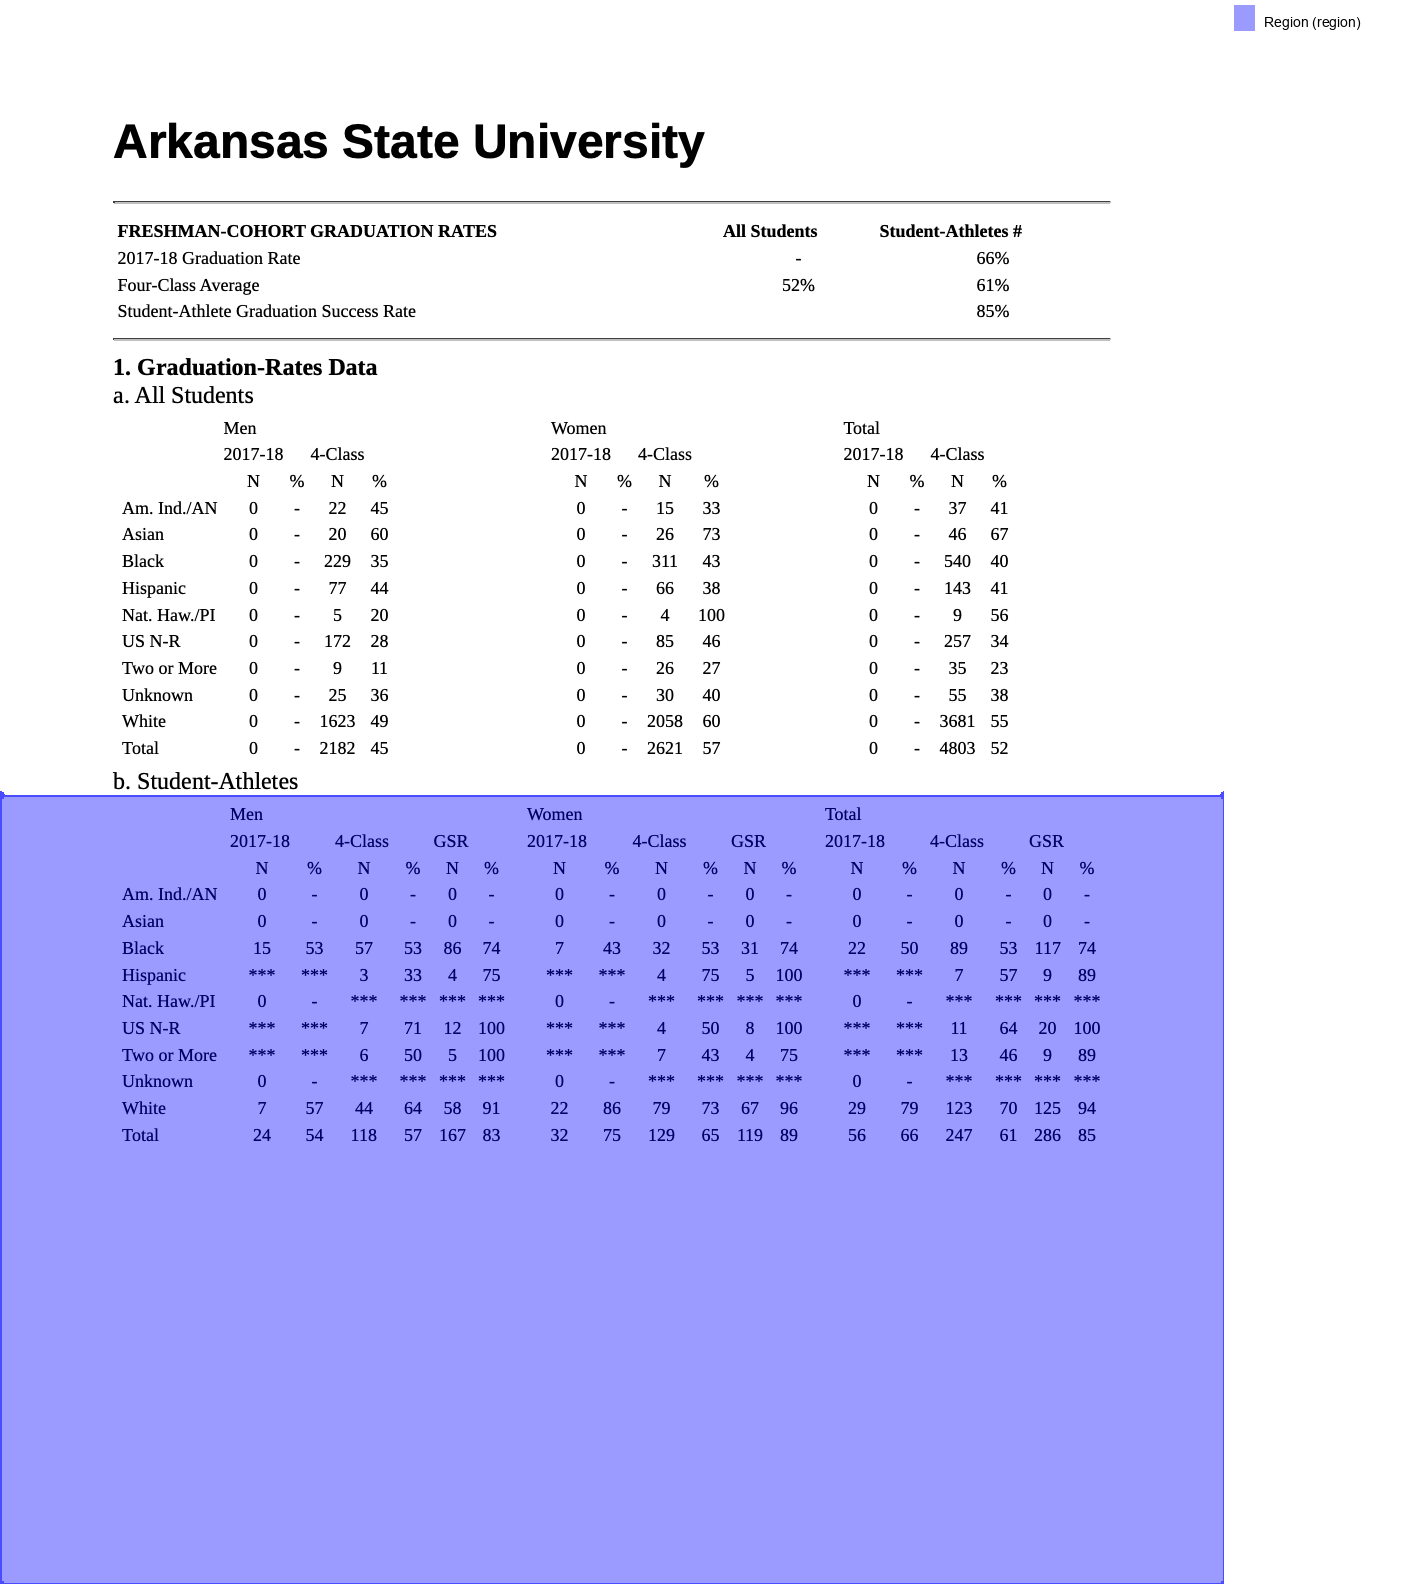

In [15]:
table_2 = (
    page

    .find(text='b. Student-Athletes')
    .below()
)
table_2.show()

In [16]:
def deduplicate_columns(columns, prefix=None):
    seen = {}
    deduped = []
    for col in columns:
        col_key = f"{prefix} {col}" if prefix else col
        if col_key not in seen:
            seen[col_key] = 1
            deduped.append(col_key)
        else:
            seen[col_key] += 1
            deduped.append(f"{col_key}_{seen[col_key] - 1}")
    return deduped

def extract_school_name(filename):
    return filename.replace(".pdf", "").replace("_", " ").strip()

def extract_arkansas_state_data(pdf_path):
    pdf = PDF(pdf_path)
    if not pdf.pages:
        return None

    school_name = extract_school_name(os.path.basename(pdf_path))
    page = pdf.pages[0]
    all_dfs = []
    try:
        top_table = page.region(top=100, height=65).extract_table()
        if top_table and len(top_table) > 1:
            df_top = pd.DataFrame(top_table[1:], columns=deduplicate_columns(top_table[0], prefix="Top"))
            df_top["Source"] = "basic info"
            df_top["School"] = school_name
            all_dfs.append(df_top)
    except Exception as e:
        print(f"Top region failed for {school_name}: {e}")
    try:
        all_students_table = page.find(text='b. Student-Athletes').above(until='text:contains("Graduation-Rates Data")')
        rows = all_students_table.extract_table(table_settings={'snap_y_tolerance': 8})
        base_header = rows[0][1:]
        sub_header = rows[1][1:]
        full_header = ["Race"] + [f"{b} {s}" for b, s in zip(base_header, sub_header)]
        full_header = deduplicate_columns(full_header, prefix="AllStudents")
        data = rows[2:]
        padded_data = [row[:len(full_header)] + [""] * (len(full_header) - len(row)) for row in data]
        df_all = pd.DataFrame(padded_data, columns=full_header)
        df_all["Source"] = "allstudents"
        df_all["School"] = school_name
        all_dfs.append(df_all)
    except Exception as e:
        print(f"All students table failed for {school_name}: {e}")
    try:
        table_2 = page.find(text='b. Student-Athletes').below()
        rows_2 = table_2.extract_table(table_settings={'snap_y_tolerance': 8})
        base_header_2 = rows_2[0][1:]
        sub_header_2 = rows_2[1][1:]
        full_header_2 = ["Race"] + [f"{b} {s}" for b, s in zip(base_header_2, sub_header_2)]
        full_header_2 = deduplicate_columns(full_header_2, prefix="StudentAthletes")
        data_2 = rows_2[2:]
        padded_data_2 = [row[:len(full_header_2)] + [""] * (len(full_header_2) - len(row)) for row in data_2]
        df_2 = pd.DataFrame(padded_data_2, columns=full_header_2)
        df_2["Source"] = "student-athletes"
        df_2["School"] = school_name
        all_dfs.append(df_2)
    except Exception as e:
        print(f"Student-athletes table failed for {school_name}: {e}")

    if all_dfs:
        return pd.concat(all_dfs, ignore_index=True)
    return None
arkansas_pdf = "pdfs/Arkansas_State_University.pdf"
existing_csv = "all_combined_by_race.csv"
output_csv = "all_combined_by_race_updated.csv"

arkansas_df = extract_arkansas_state_data(arkansas_pdf)
if arkansas_df is not None:
    existing_df = pd.read_csv(existing_csv)
    combined_df = pd.concat([existing_df, arkansas_df], ignore_index=True)
    combined_df.to_csv(output_csv, index=False)
    print("Saved to", output_csv)
else:
    print("No data extracted from Arkansas State University.")

FileNotFoundError: [Errno 2] No such file or directory: 'all_combined_by_race.csv'

In [ ]:
#The one below was to run for the 1st ten that originally was not in the original list, but it can now be pulled from above

In [15]:
import os
import pandas as pd
from natural_pdf import PDF

def deduplicate_columns(columns):
    seen = {}
    deduped = []
    for col in columns:
        if col not in seen:
            seen[col] = 1
            deduped.append(col)
        else:
            seen[col] += 1
            deduped.append(f"{col}_{seen[col]-1}")
    return deduped

def extract_school_name(filename):
    return filename.replace(".pdf", "").replace("_", " ").strip()

pdf_folder = "pdfs_1stpg"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])
all_rows = []

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school_name = extract_school_name(filename)
    pdf = PDF(filepath)

    if not pdf.pages:
        continue

    page = pdf.pages[0]

    try:
        table = page.find(text='b. Student-Athletes').above(until='text:contains("Graduation-Rates Data")')
        rows = table.extract_table(table_settings={'snap_y_tolerance': 8})

        base_header = rows[0][1:]
        sub_header = rows[1][1:]
        combined_cols = [f"{b} {s}" for b, s in zip(base_header, sub_header)]
        full_header = ["Race"] + combined_cols
        data = rows[2:]
        data_padded = [row[:len(full_header)] + [""] * (len(full_header) - len(row)) for row in data]
        df_all = pd.DataFrame(data_padded, columns=full_header)
        df_all["Source"] = "All Students"
        df_all["School"] = school_name

        table_2 = page.find(text='b. Student-Athletes').below()
        rows_2 = table_2.extract_table(table_settings={'snap_y_tolerance': 8})

        base_header_2 = rows_2[0][1:]
        sub_header_2 = rows_2[1][1:]
        combined_cols_2 = [f"{b} {s}" for b, s in zip(base_header_2, sub_header_2)]
        full_header_2 = ["Race"] + [f"Student-Athletes {col}" for col in combined_cols_2]
        data_2 = rows_2[2:]
        data_2_padded = [row[:len(full_header_2)] + [""] * (len(full_header_2) - len(row)) for row in data_2]
        df_2 = pd.DataFrame(data_2_padded, columns=full_header_2)

        combined = pd.merge(df_all, df_2, on="Race", how="outer")
        combined.columns = deduplicate_columns(combined.columns)

        all_rows.append(combined)

    except Exception as e:
        print(f"Failed for {filename}: {e}")
        continue
if all_rows:
    final_df = pd.concat(all_rows, ignore_index=True)
    final_df.to_csv("all_combined_by_race_first_page.csv", index=False) 
    print("Saved to all_combined_by_race_first_page.csv")
else:
    print("No data extracted.")


FileNotFoundError: [Errno 2] No such file or directory: 'pdfs_1stpg'